# ZSU Exploration Analysis and Clustering Project Information
# Author: Yeromenko Maksym | YER0013
## Social, gender and study data from secondary school students
### Content:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)
### These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)

- G2 - second period grade (numeric: from 0 to 20)

- G3 - final grade (numeric: from 0 to 20, output target)

## Download dataset
https://homel.vsb.cz/~svo0175/zsu_04_student.zip

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.preprocessing
from IPython.core.pylabtools import figsize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from sklearn.cluster import AgglomerativeClustering

## Load the data 

In [2]:
student_por = pd.read_csv('student-por.csv')
student_mat = pd.read_csv('student-mat.csv')

student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Exploratory data analysis for assigned dataset.


In [3]:
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Datatypes of columns for both datasets

In [4]:
student_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
student_por.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Checking for missing values for both datasets

In [6]:
student_por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [16]:
student_mat.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Number of columns and rows in both datasets

In [19]:
student_por.shape

(649, 33)

## Non numeric columns

In [5]:
non_numeric_columns = student_por.select_dtypes(exclude=np.number)
non_numeric_columns

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [20]:
student_mat.shape

(395, 33)

## Distribution of Final Grades (G3) for both datasets

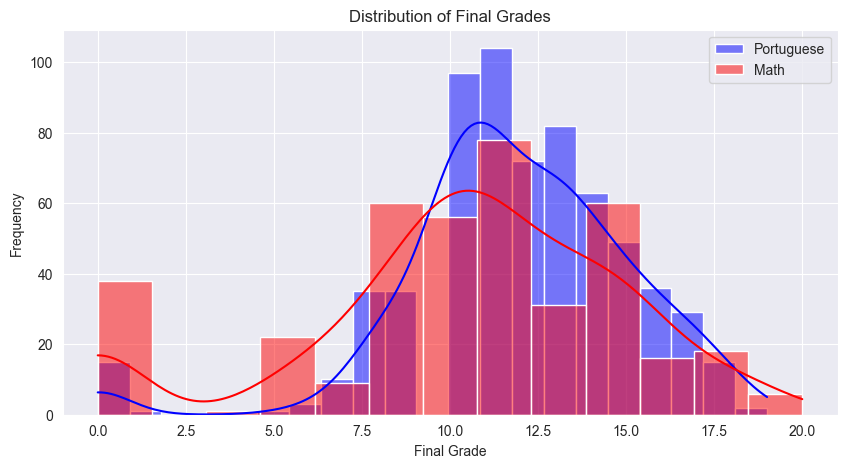

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(student_por['G3'], kde=True, color='blue', label='Portuguese')
sns.histplot(student_mat['G3'], kde=True, color='red', label='Math')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## How study time affected the final grade
As we can see the more student's study the better mark they get

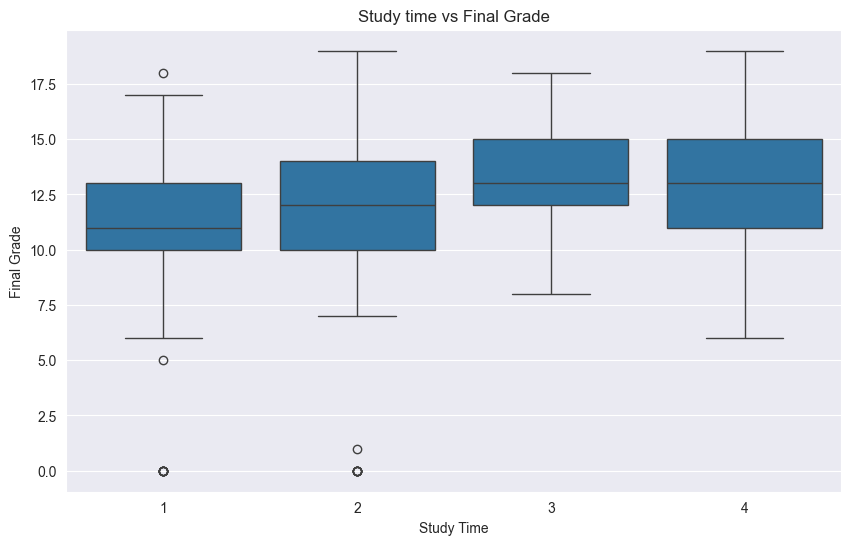

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=student_por)
plt.title('Study time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

## Now we will check how often students consume alcohol on weekdays and weekends and how it affects their health

Text(0, 0.5, 'Health')

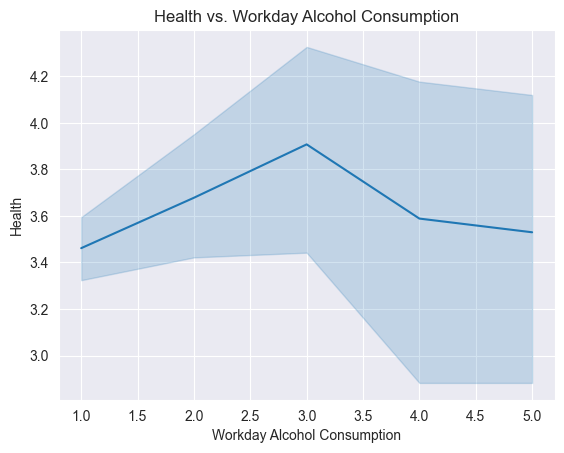

In [4]:
sns.lineplot(data=student_por, x='Dalc', y='health')
plt.title('Health vs. Workday Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Health')

Text(0, 0.5, 'Health')

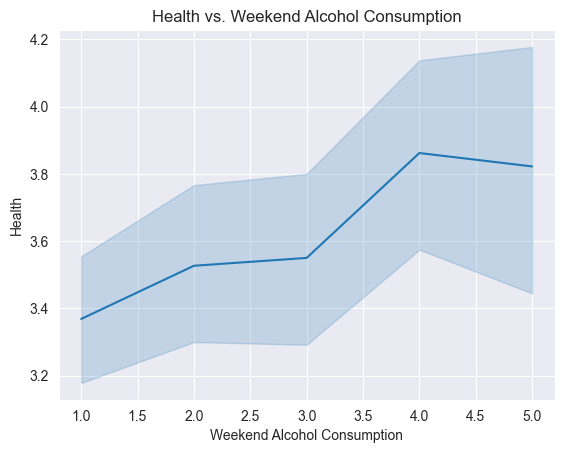

In [6]:
sns.lineplot(data=student_por, x='Walc', y='health')
plt.title('Health vs. Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Health')

As we can see from the graphs above, students who consume alcohol more often have worse health.

## How alcohol affect grades

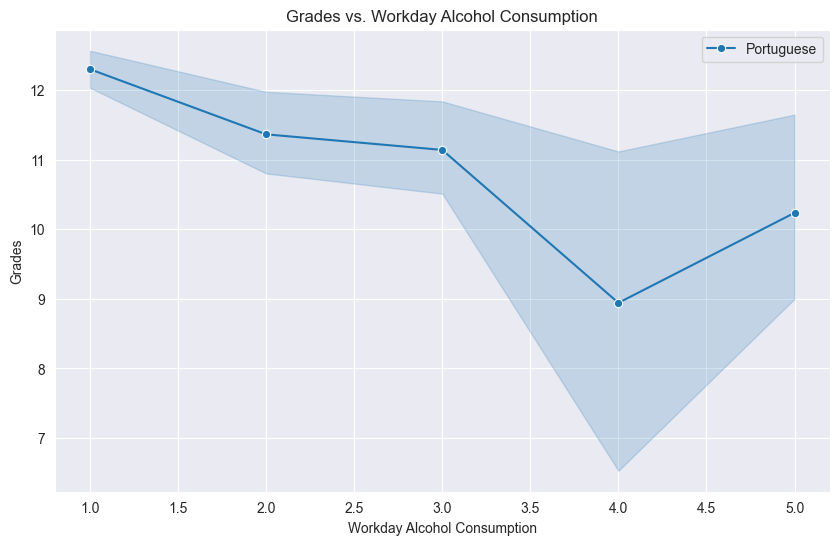

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=student_por, x='Dalc', y='G3', marker='o', label='Portuguese')
plt.title('Grades vs. Workday Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Grades')
plt.legend()

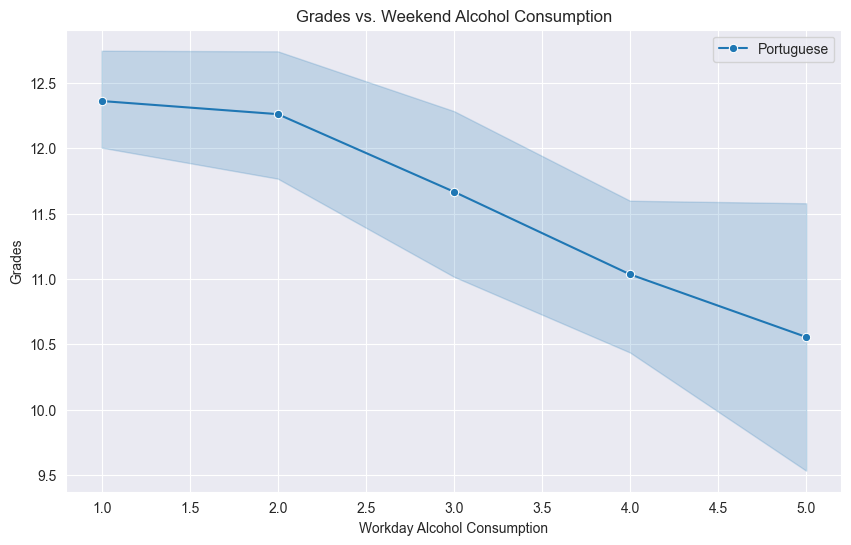

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=student_por, x='Walc', y='G3', marker='o', label='Portuguese')
plt.title('Grades vs. Weekend Alcohol Consumption')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('Grades')
plt.legend()

On the graph above we can see that students who consume alcohol more often have lower grades.

## Let's check who consume alcohol more 

<Axes: xlabel='sex', ylabel='Walc'>

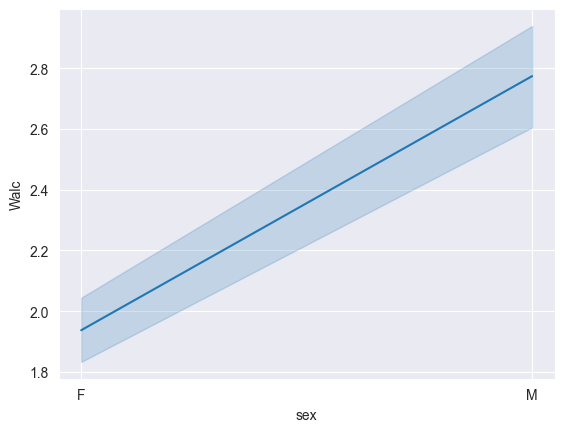

In [22]:
sns.lineplot(data=student_por, x='sex', y='Walc')

Male students consume more alcohol on weekends than female

## What age group consumes more alcohol

<Axes: xlabel='age', ylabel='Walc'>

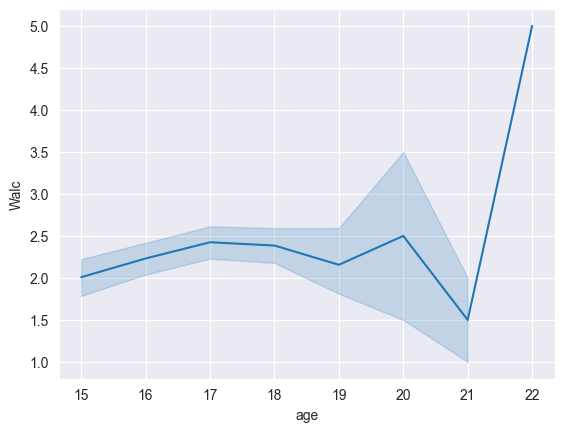

In [21]:
sns.lineplot(data=student_por, x='age', y='Walc')

In this graph students of age 21 or more consume a much more alcohol

## How family support affect the final grades?

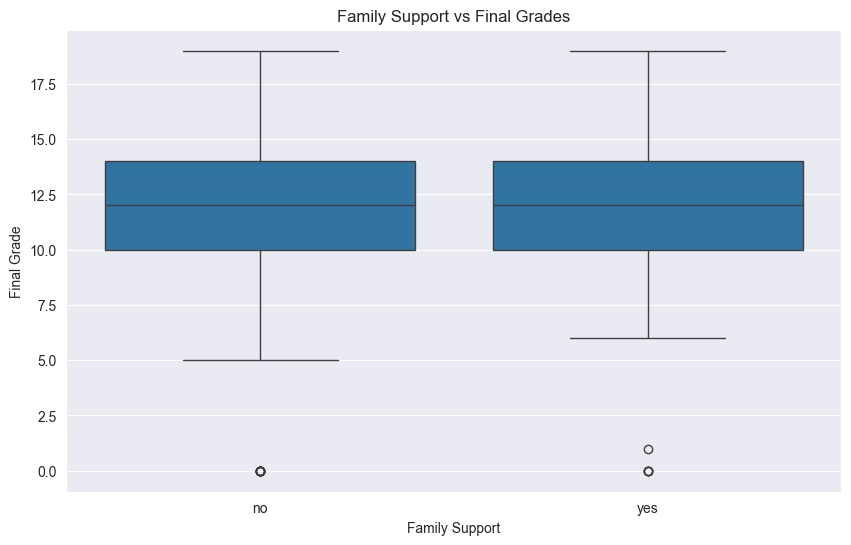

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='famsup', y='G3', data=student_por)
plt.title('Family Support vs Final Grades')
plt.xlabel('Family Support')
plt.ylabel('Final Grade')
plt.show()

Family support doesn't affect the final grades

## How the mother's and father's education affect the final grades

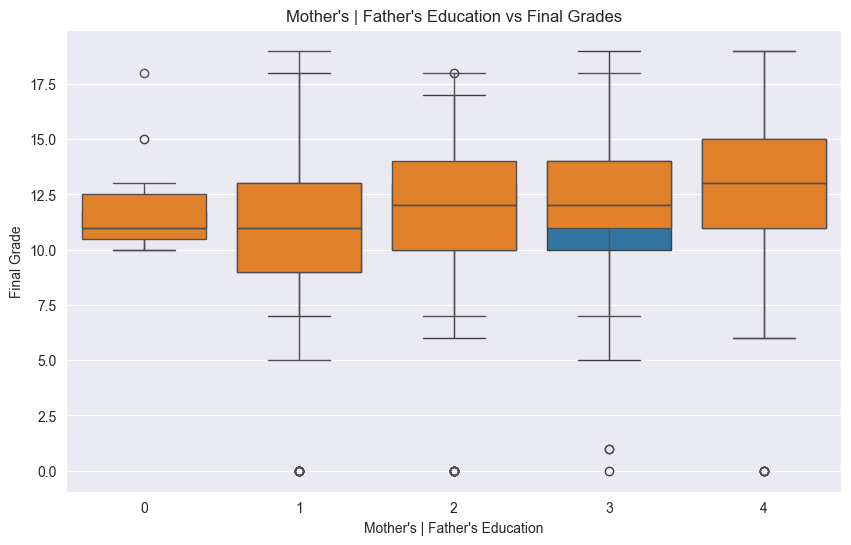

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G3', data=student_por)
sns.boxplot(x='Fedu', y='G3', data=student_por)
plt.title('Mother\'s | Father\'s Education vs Final Grades')
plt.xlabel('Mother\'s | Father\'s Education')
plt.ylabel('Final Grade')
plt.show()

Student's grades also depends on mother's and father's education. If parents have a college degree, the students have better grades.

## Correlation

<Axes: >

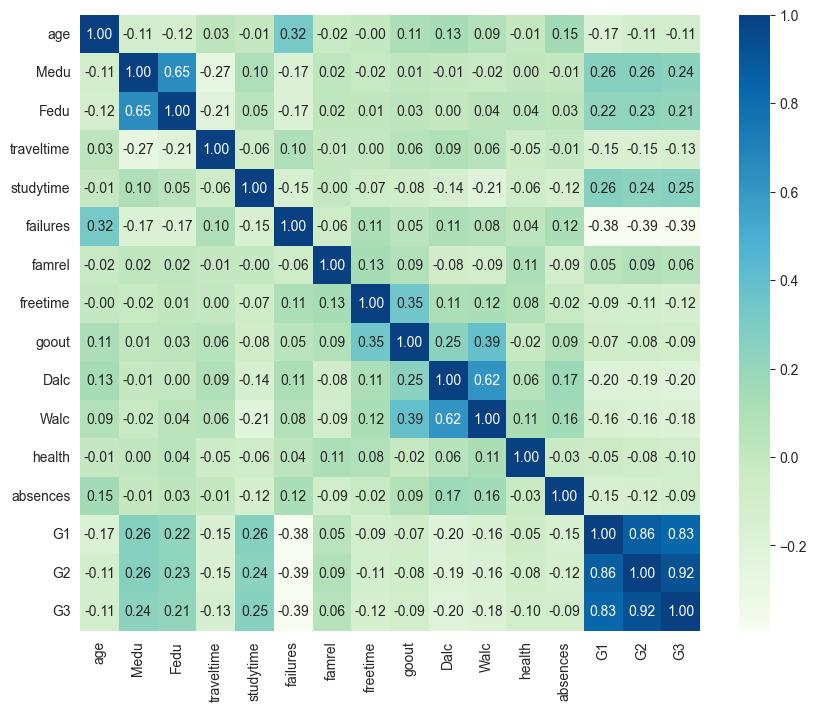

In [10]:
heatmap = student_por.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(heatmap, annot=True, fmt='.2f', cmap='GnBu', xticklabels=heatmap.columns, yticklabels=heatmap.columns)

### As we can see from this heatmap, we can notice that:
- Student who studies more have a better grades.
- Student with high age has more absences and they consume alcohol more
- If parents have a good education, students has a better grades

## Histograms

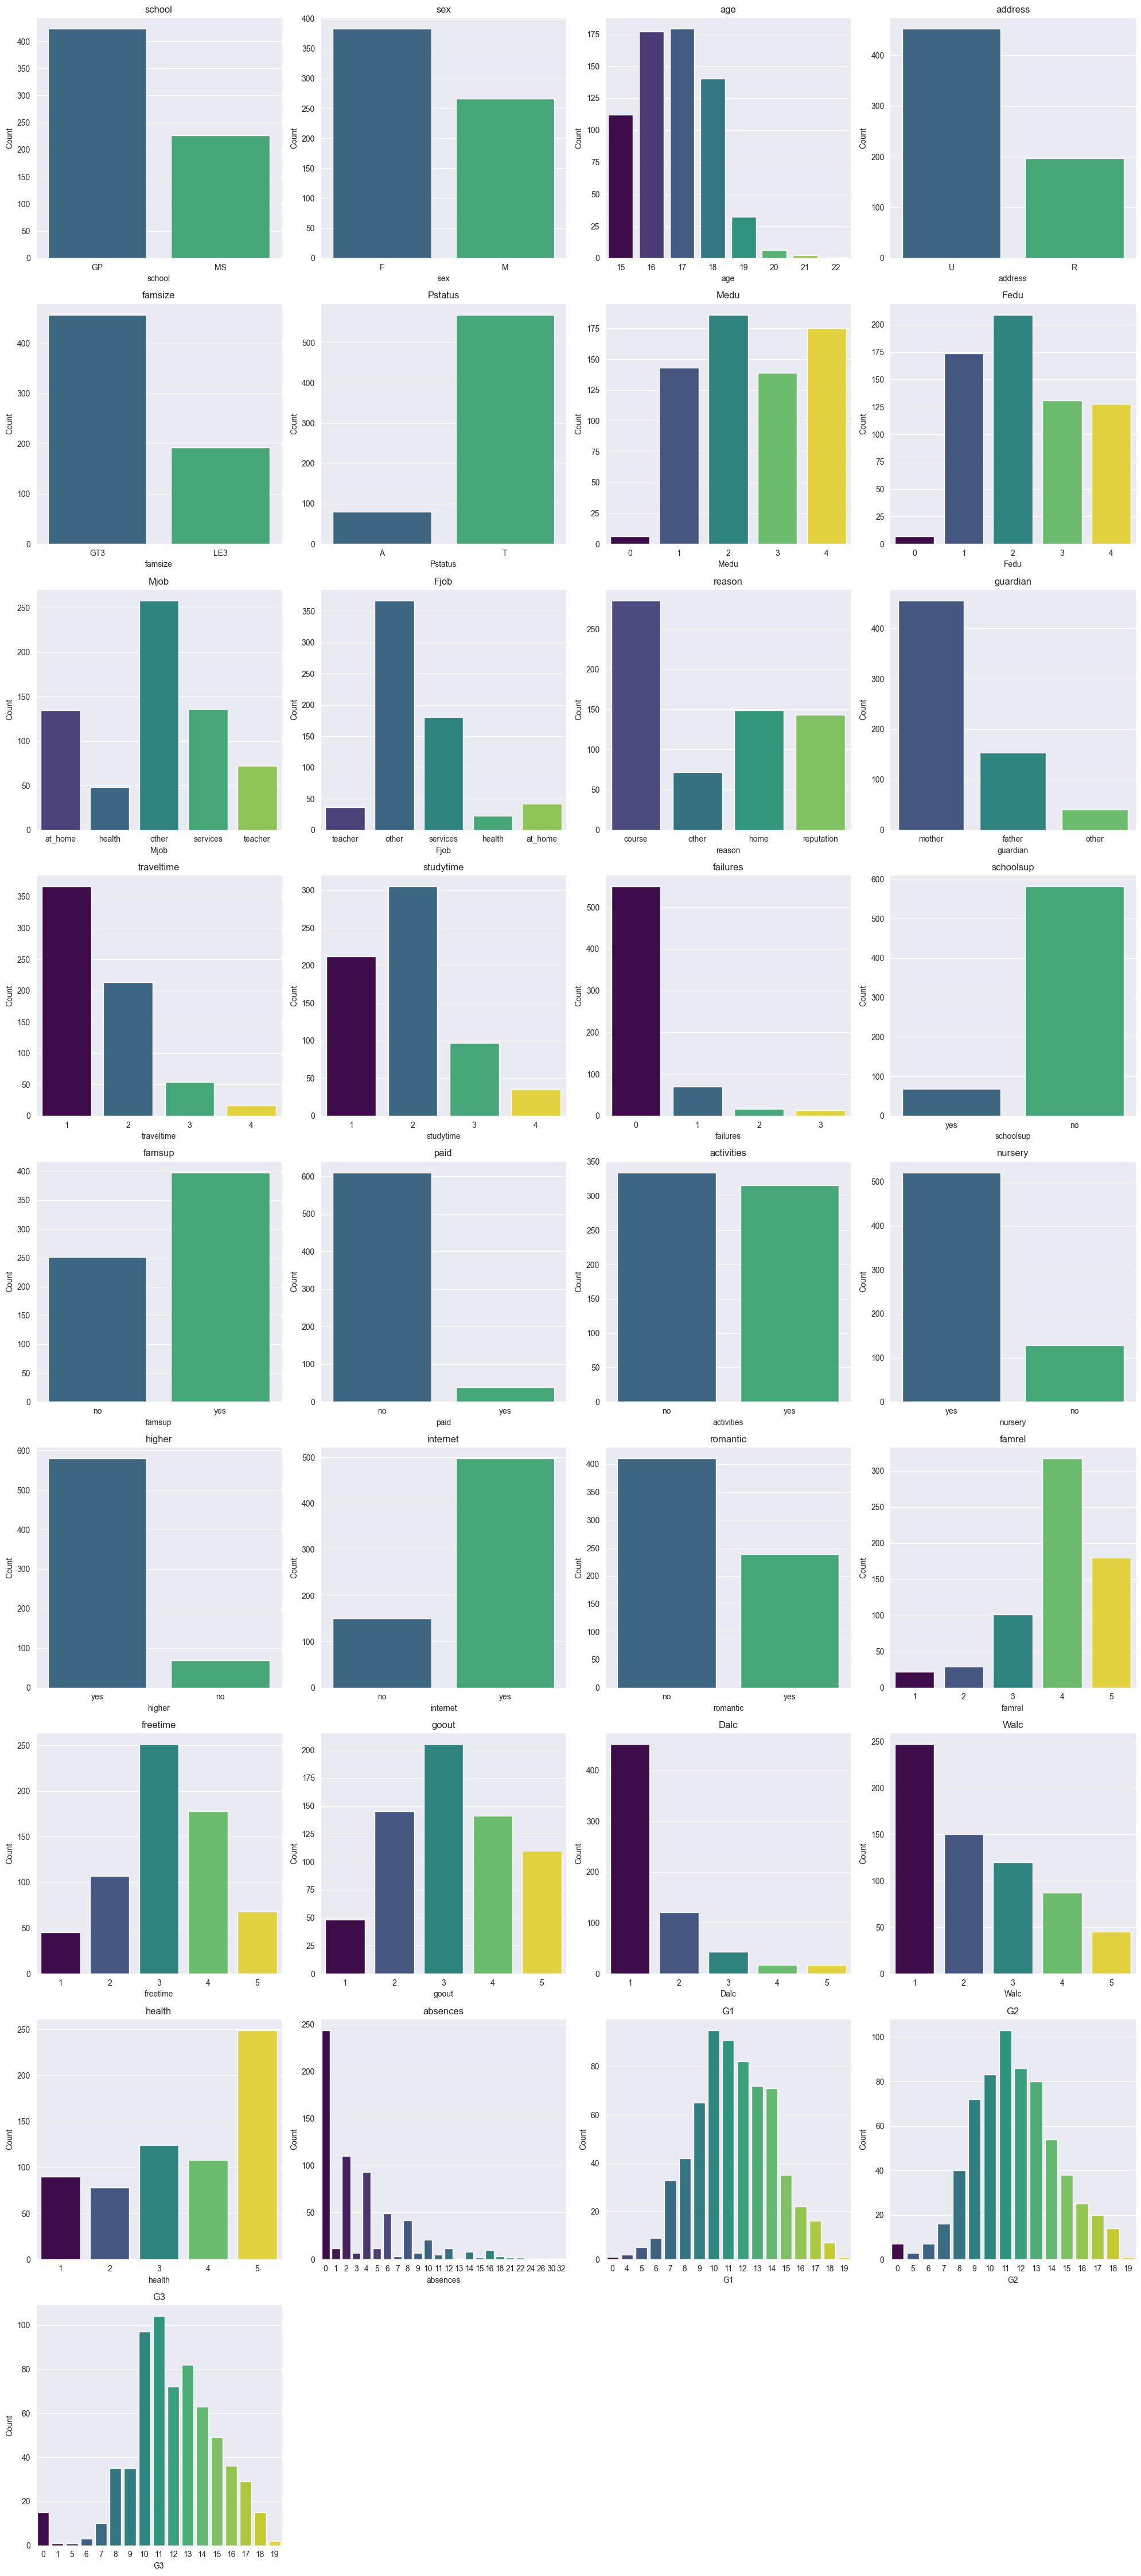

In [50]:
all_columns = student_por.columns

n_cols = 4
n_rows = (len(all_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

axes = axes.flatten()

for i, column in enumerate(all_columns):
    sns.countplot(x=student_por[column],hue=student_por[column] ,ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here we can see all the columns in the dataset

# Clustering using KMeans

## Firstly, we need to encode the categorical data to numerical data using OrdinalEncoder. 

In [3]:
encoded = sklearn.preprocessing.OrdinalEncoder()

student_por_encoded = student_por.copy()
student_por_encoded[student_por_encoded.select_dtypes(include='object').columns.to_list()] = encoded.fit_transform(student_por_encoded.select_dtypes(include='object'))
student_por_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,...,4,3,4,1,1,3,4,0,11,11
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,...,5,3,3,1,1,3,2,9,11,11
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,...,4,3,2,2,3,3,6,12,13,12
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,...,3,2,2,1,1,5,0,14,14,14
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.0,0.0,19,0.0,0.0,1.0,2,3,3.0,2.0,...,5,4,2,1,2,5,4,10,11,10
645,1.0,0.0,18,1.0,1.0,1.0,3,1,4.0,3.0,...,4,3,4,1,1,1,4,15,15,16
646,1.0,0.0,18,1.0,0.0,1.0,1,1,2.0,2.0,...,1,1,1,1,1,5,6,11,12,9
647,1.0,1.0,17,1.0,1.0,1.0,3,1,3.0,3.0,...,2,4,5,3,4,2,6,10,10,10


## We need to understand which data we need to scale, so let's check

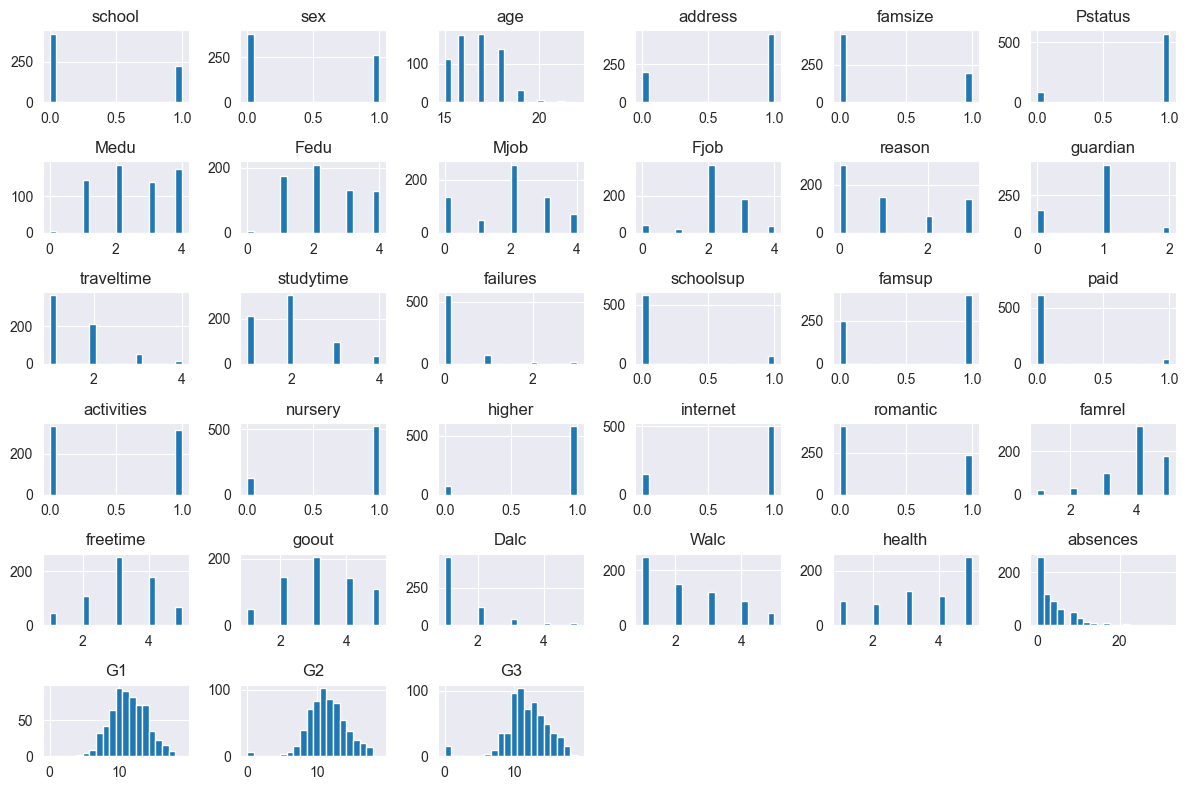

In [5]:
student_por_encoded.hist(figsize(12,8), bins=20)
plt.tight_layout()

## Now we need to scale the Age, Medu, Fedu, Mjob, Fjob, traveltime, studytime,famrel, freetime, goout, walc, dalc, health,absences by using MinMax scaler

In [6]:
scale_columns = ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Walc', 'Dalc', 'health', 'absences']
student_por_scaled = student_por_encoded.copy()
student_por_scaled[scale_columns] = sklearn.preprocessing.minmax_scale(student_por_encoded[scale_columns])

## Here we will scale our grades from 0 to 5 by using MinMax scale

In [7]:
student_por_scaled[['G1', 'G2', 'G3']] = sklearn.preprocessing.minmax_scale(student_por_encoded[['G1', 'G2', 'G3']], feature_range=(0, 5))

## Our scaled data

In [8]:
student_por_scaled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,2.894737,2.894737
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,2.368421,2.894737,2.894737
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,3.157895,3.421053,3.157895
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,3.684211,3.684211,3.684211
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,2.894737,3.421053,3.421053


In [17]:
student_por_scaled.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.348228,0.409861,0.249175,0.696456,0.295840,0.876733,0.628659,0.576656,0.485362,0.556240,...,0.732666,0.545069,0.546225,0.125578,0.320108,0.634052,0.114359,2.999757,3.044765,3.133160
std,0.476776,0.492187,0.174020,0.460143,0.456771,0.328996,0.283638,0.274983,0.312079,0.215872,...,0.238929,0.262773,0.293942,0.231209,0.321095,0.361565,0.145024,0.722438,0.766747,0.850173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.142857,0.000000,0.000000,1.000000,0.500000,0.250000,0.250000,0.500000,...,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,2.631579,2.631579,2.631579
50%,0.000000,0.000000,0.285714,1.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,...,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.062500,2.894737,2.894737,3.157895
75%,1.000000,1.000000,0.428571,1.000000,1.000000,1.000000,1.000000,0.750000,0.750000,0.750000,...,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,0.187500,3.421053,3.421053,3.684211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000


## We will use a Elbow method to identify potentially ideal number of clusters in our data. SSE(sum of squared distances) and Silhouette Coefficient.

In [9]:
clustering_scores = []
X = student_por_scaled.values
for k in range(2, 11):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X)
    clustering_scores.append({
        'k': k,
        'sse': kmeans.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X, kmeans.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

## Plot the SSE and Silhouette score

<Axes: xlabel='k', ylabel='silhouette'>

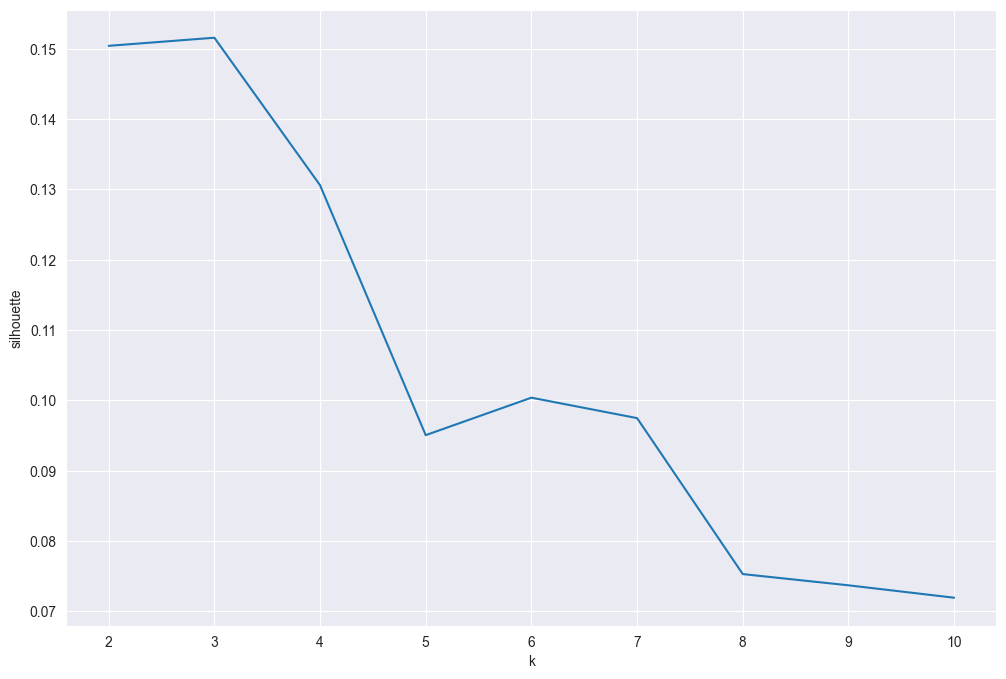

In [10]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

<Axes: xlabel='k', ylabel='sse'>

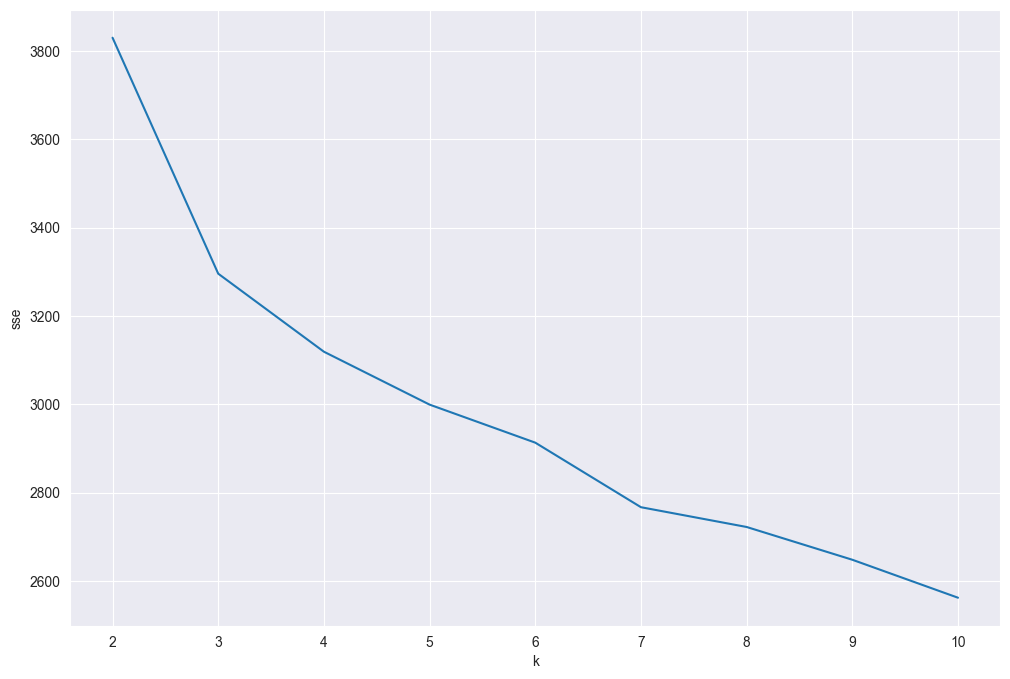

In [11]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

## The ideal number of clusters are 3. Now we will apply cluster labels on our dataset

In [32]:
clusters = 3
clustering = sklearn.cluster.KMeans(n_clusters=clusters, random_state=13).fit(X)
student_por_clustered = student_por.copy()
student_por_clustered['cluster_id'] = clustering.labels_
student_por_clustered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster_id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,2
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,1
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,1


## Size of clusters

In [45]:
pd.Series(clustering.labels_).value_counts()

2    258
1    211
0    180
Name: count, dtype: int64

## By using scatterplot and pairplot we can see the difference between our clusters in graphs.

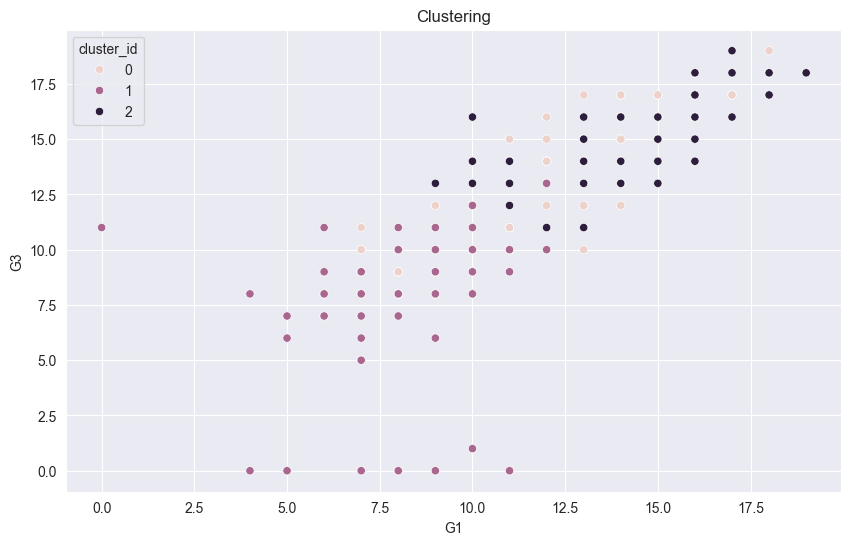

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='G1', y='G3', data=student_por_clustered, hue='cluster_id')
plt.title('Clustering')
plt.show()

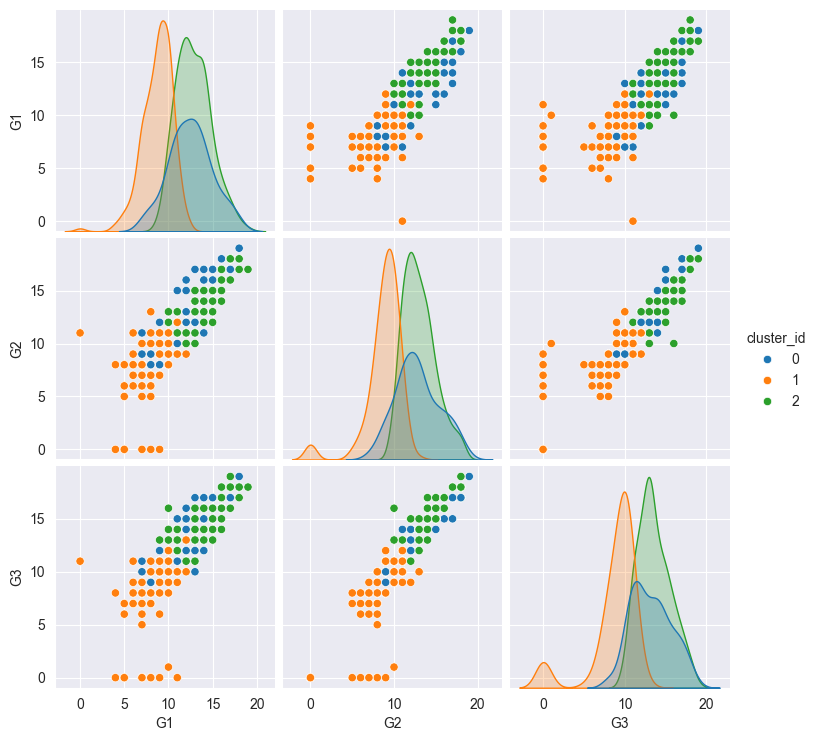

In [14]:
sns.pairplot(student_por_clustered, hue='cluster_id', vars=['G1', 'G2', 'G3'], palette='tab10')
plt.show()

## Now let's look at all graphs and compare them

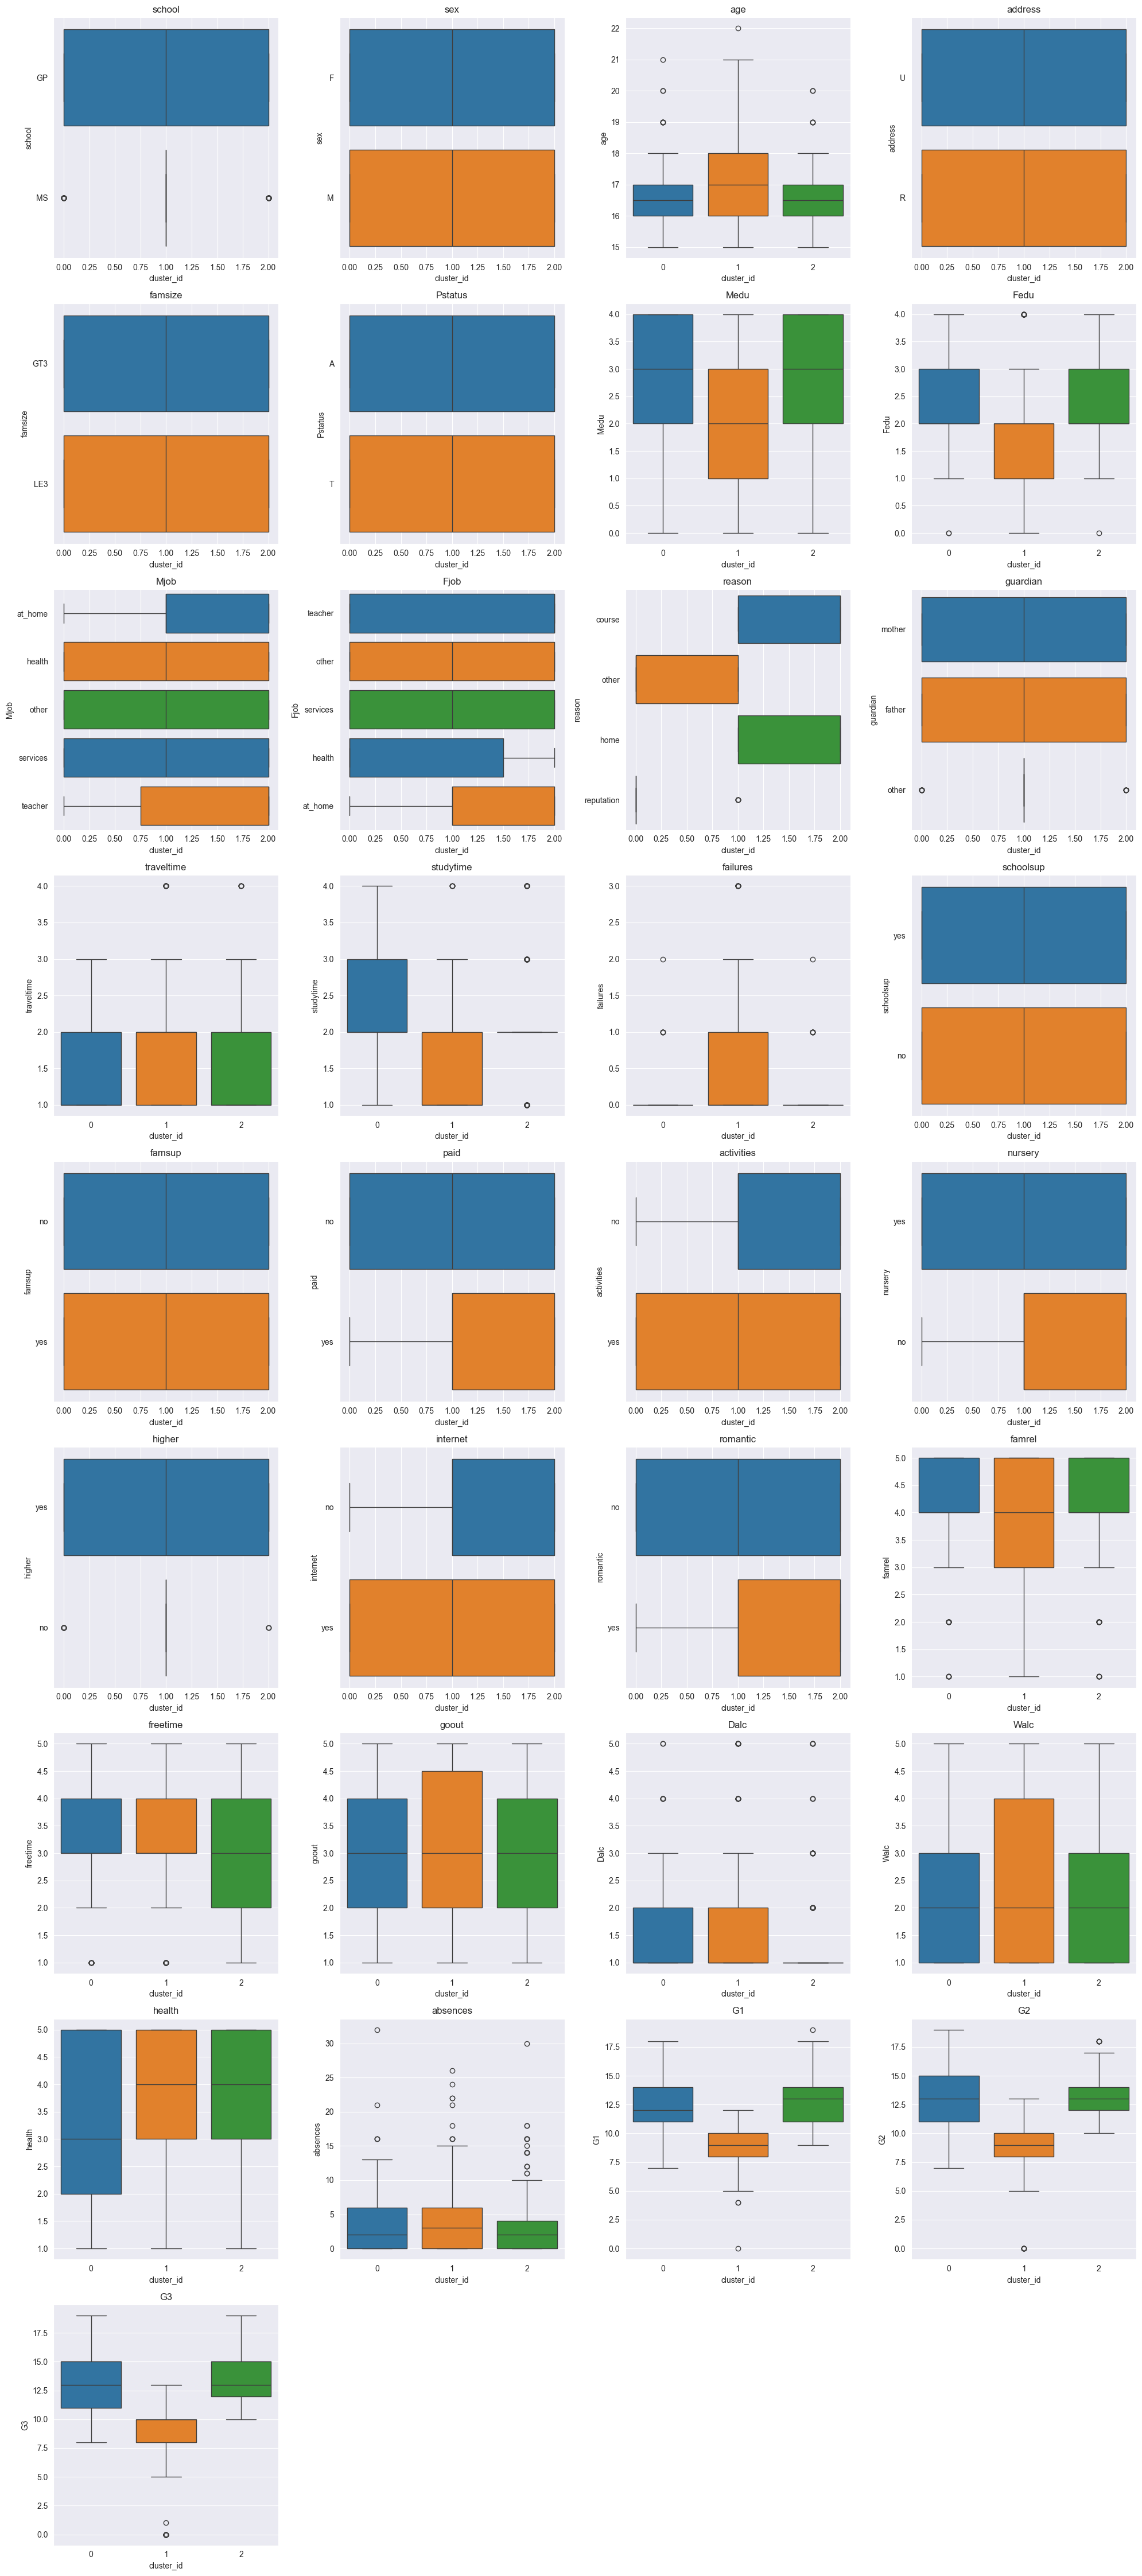

In [33]:
columns = student_por.columns.to_list()
num_columns = 4
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

axes = axes.flatten()

palette = sns.color_palette("tab10", n_colors=student_por_clustered['cluster_id'].nunique())

for idx, column in enumerate(columns):
    sns.boxplot(x='cluster_id', y=column, data=student_por_clustered, ax=axes[idx], palette=palette)
    axes[idx].set_title(column)

for ax in axes[len(columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

## KMeans clusters description
### Cluster 0:
- Age from 16 to 17
- High mother education
- High father education
- Travel time same as cluster 1 and 2
- High study time
- 0 failures
- Very good family relationship
- Good amount of free time
- Usually going out with friends
- Low workday alcohol consumption
- Average weekend alcohol consumption
- Health from bad to very good
- Not many absences
- High grades
### Cluster 1
- Age from 16 to 18
- Low mother education
- Low father education
- Travel time same as cluster 0 and 2
- Low study time
- Have some failures
- Good family relationship
- Good amount of free time
- Frequently going out with friends
- Health higher than average
- Not many absences
- Low grades
- Low workday alcohol consumption
- High weekend alcohol consumption
### Cluster 2
- Age from 16 to 17
- High mother education
- High father education
- Travel time same as cluster 1 and 0
- Average study time
- 0 failures
- Very good family relationship
- Good amount of free time
- Usually going out with friends
- Doesn't consume alcohol in workdays
- Average weekend alcohol consumption
- Health higher than average
- Low absences
- High grades
### Conclusion
- **Cluster 0** and **Cluster 2** represent more successful students with high grades, good family relationships, and high parental education levels.
- **Cluster 1** represents less successful students with lower grades, lower parental education levels, and higher alcohol consumption on weekends.

# Agglomerative Clustering
Creating linkage matrix and then plotting the dendrogram

In [15]:
def plot_dendrogram(model, **kwargs):

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title('Hierarchical Clustering Dendrogram')
    dendrogram(linkage_matrix, **kwargs)
    plt.ylabel('distance')

## Complete linkage

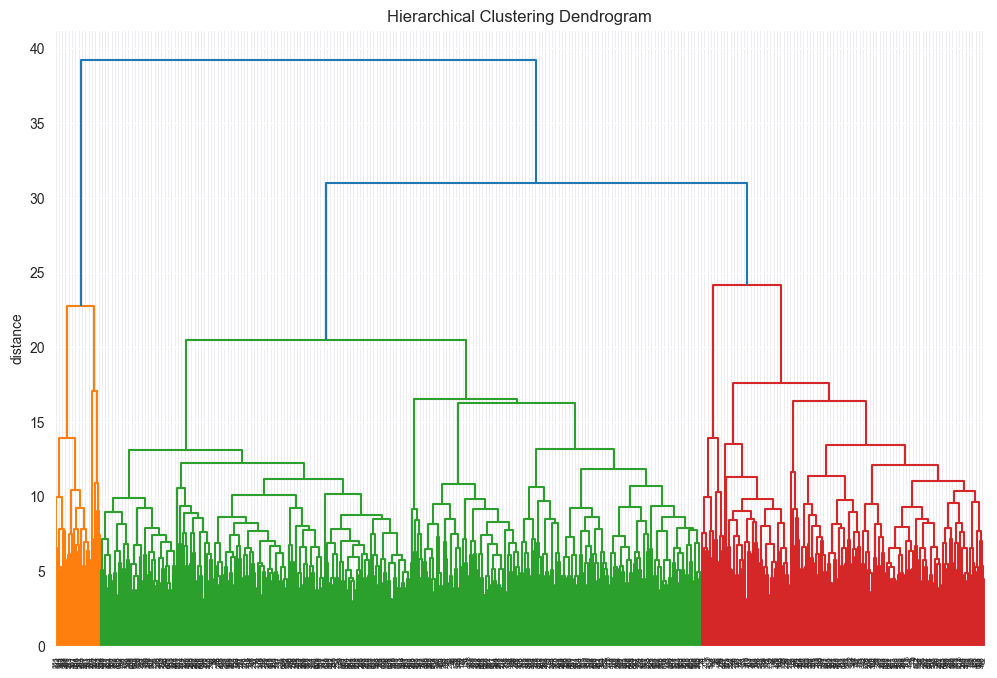

In [22]:
clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(student_por_encoded)

plot_dendrogram(clustering, labels=clustering.labels_)

## Now we need to level for split out data to clusters

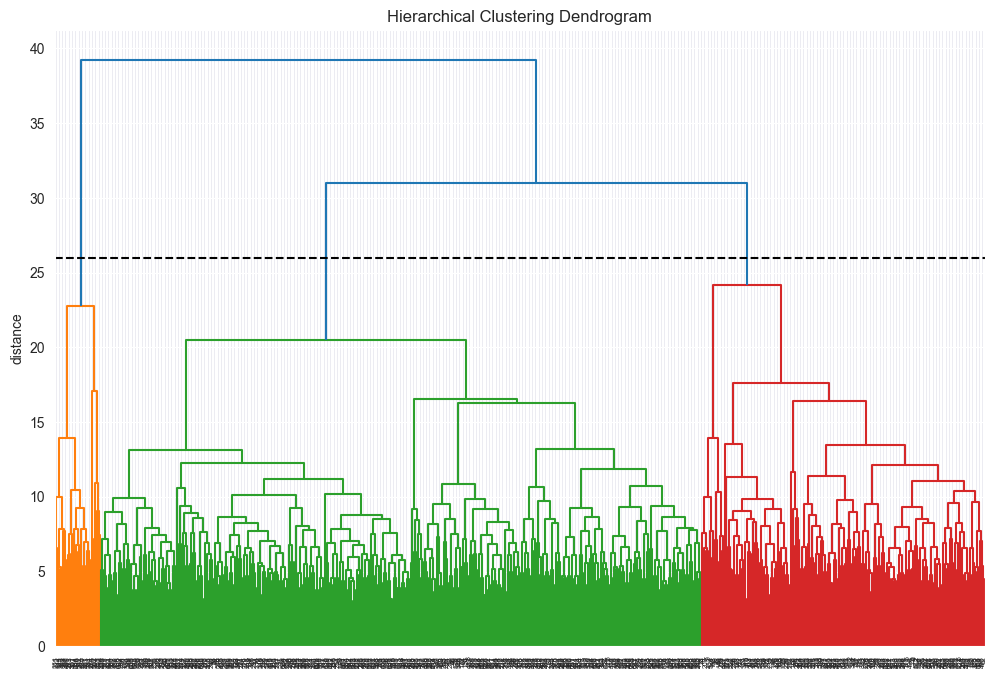

In [23]:
plot_dendrogram(clustering, labels=clustering.labels_)
plt.axhline(y=26, color='black', linestyle='--')

## Single linkage

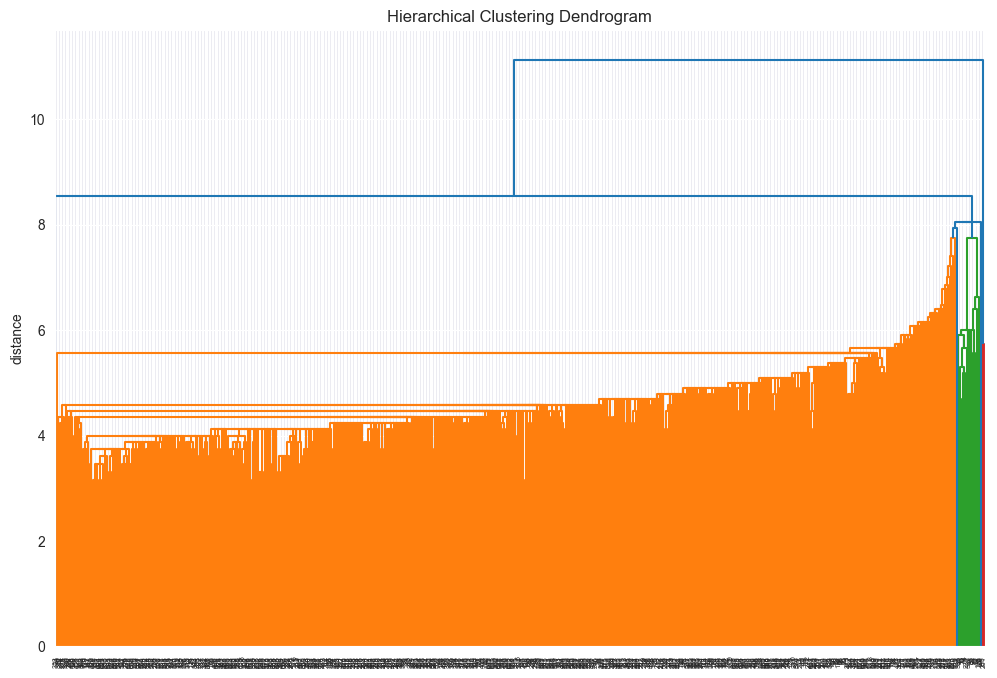

In [17]:
clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
clustering = clustering.fit(student_por_encoded)
plot_dendrogram(clustering, labels=clustering.labels_)

## So the ideal number of clusters is 3

In [28]:
clustering = sklearn.cluster.AgglomerativeClustering(distance_threshold=None, n_clusters=3,linkage='complete').fit(student_por_encoded.values)

student_por_clustered['cluster_id'] = clustering.labels_
student_por_clustered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cluster_id
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,2
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,0


## Let's see the difference between our clusters. We will create a boxplot to see the difference.

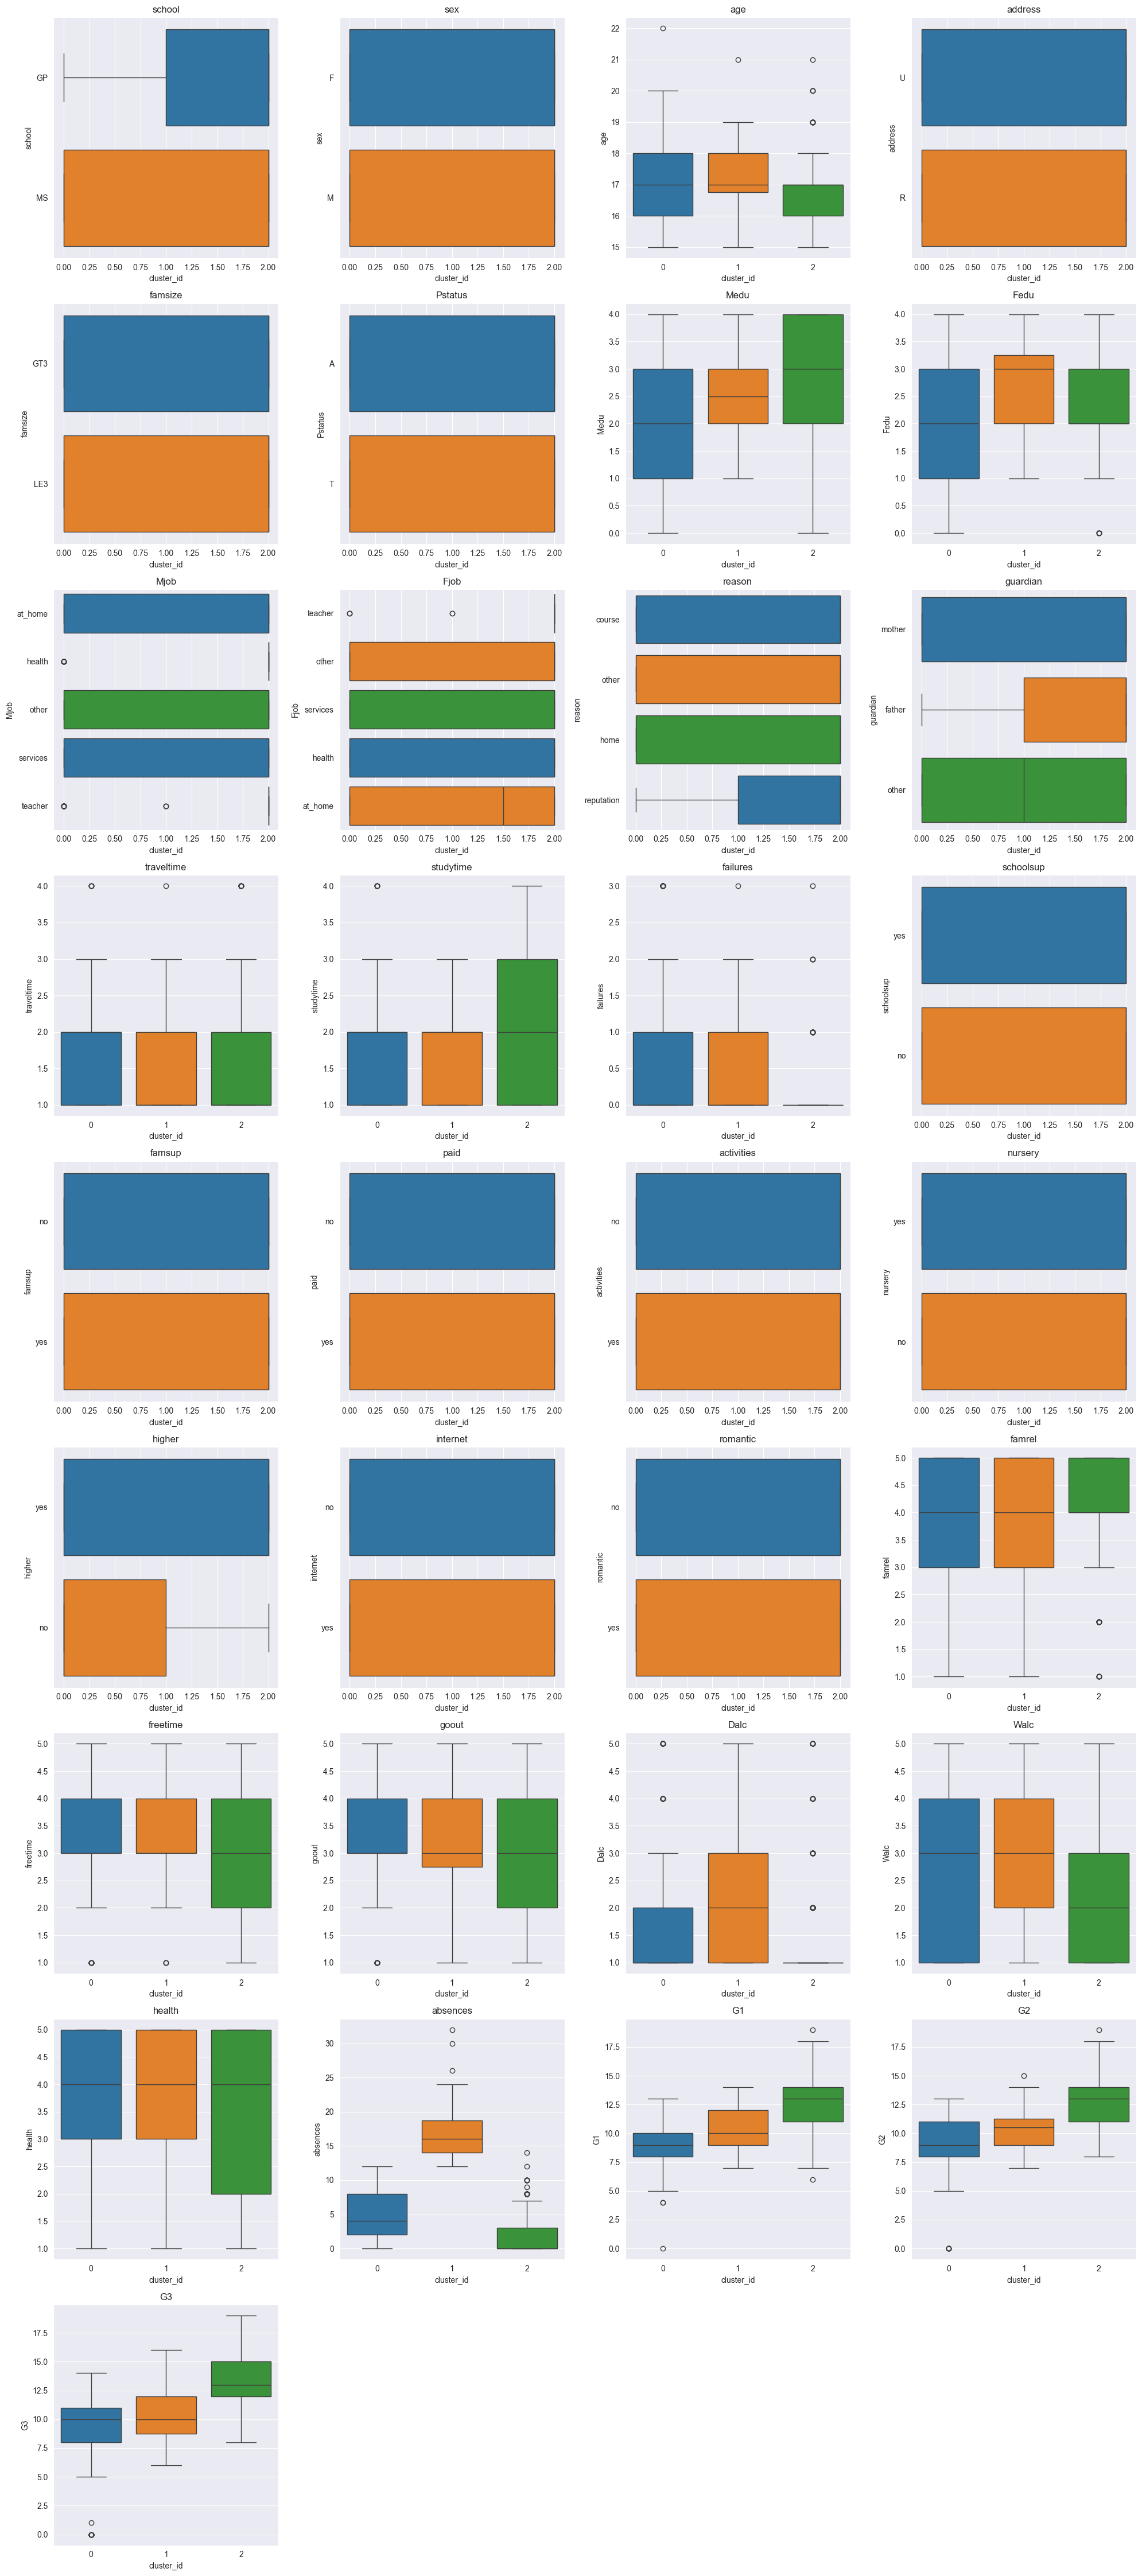

In [30]:
columns = student_por.columns.to_list()
num_columns = 4
num_rows = (len(columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

axes = axes.flatten()

palette = sns.color_palette("tab10", n_colors=student_por_clustered['cluster_id'].nunique())

for idx, column in enumerate(columns):
    sns.boxplot(x='cluster_id', y=column, data=student_por_clustered, ax=axes[idx], palette=palette)
    axes[idx].set_title(column)

for ax in axes[len(columns):]:
    ax.remove()

plt.tight_layout()
plt.show()

## Agglomerative clustering description
## Cluster 0
- Age from 16 to 18
- Below average of travel time
- Below average of study time
- Has some failures
- High quality of family relationship
- Good amount of free time
- Usually going out with friends
- Low workday alcohol consumption
- Can be low and high weekday alcohol consumption
- Good health
- Average absences
- Low grades
## Cluster 1
- Age from 17 to 18
- Same travel time as cluster 0 and 2
- Below average of study time
- Has some failures
- High quality of family relationship
- Good amount of free time
- A little bit less time for going out with friends then cluster 0
- More weekday and workday alcohol consumption then cluster 0
- Good health
- A lot of absences
- Average grades
## Cluster 2
- Age from 16 to 17
- Same travel time as cluster 0 and 1
- High study time
- Low failures
- A better quality of family relationship then in clusters 0 and 1
- Less amount of free time and going out with friends then in cluster 0 and 1
- Low workday and weekday alcohol consumption
- A little bit worse health then cluster 0 and 1
- Low absences
- High grades
## Conclusion
- **Cluster 0** represents students with low grades, some failures, and a good amount of free time. They have a high quality of family relationships and usually go out with friends. Their alcohol consumption varies, and they have good health with average absences.
- **Cluster 1** represents students with average grades, some failures, and a good amount of free time. They have a high quality of family relationships but go out with friends less than cluster 0. They consume more alcohol on weekdays and workdays, have good health, and a lot of absences.
- **Cluster 2** represents students with high grades, low failures, and less free time. They have the best quality of family relationships, go out with friends less often, and have low alcohol consumption. Their health is slightly worse than clusters 0 and 1, and they have low absences.
## Difference between KMeans and Agglomerative clustering
- **KMeans** provides cleaner, more distinct groupings that are easier to interpret.
- **Agglomerative clustering** captures more nuanced behaviors but can result in overlapping or mixed characteristics.

